### 차원축소

차원축소
feature가 많을수록 데이터의 차원이 커지게 되는데, 데이터셋의 크기에 비해 feature가 많아질 경우 이를 표현하기 위한 변수가 많아져 모델의 복잡성이 증가되고 과적합 문제가 발생되기도 합니다.
이러한 문제를 해결하기 위해 차원 축소 방법이 사용되고 있습니다.
*용어: 차원이란? 데이터 포인트를 공간에 표현하기 위해 필요한 최소한의 축의 개수

#### PCA(Principal Component Analysis)

차원 축소 기법 중 대표적인 기법
고차원에서 저차원으로 축소하는 선형 투영 기법
데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

PCA 단계

데이터에서 분산이 최대인 축을 찾음 (첫번째 축)
첫번째 축과 직교하면서 분산이 최대인 축을 찾음 (두번째 축)
첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음 (세번째 축)

In [2]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [5]:
df = data.copy()

### PCA
2차원이나 3차원으로 축소할경우 시각화가능하다는 장점

In [6]:
from sklearn.decomposition import PCA #decomposition 분해

In [7]:
pca = PCA(n_components = 2)

In [8]:
df = pca.fit_transform(df)  # numpy 형태로 나옴
print(df.shape)
df

(178, 2)


array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [9]:
# 시각화
import matplotlib.pyplot as plt
df = pd.DataFrame(df) # pd.DataFrame형태로 변환
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


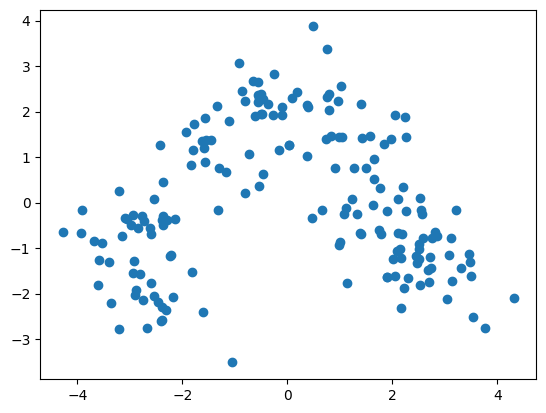

In [10]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:,1] )

In [11]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

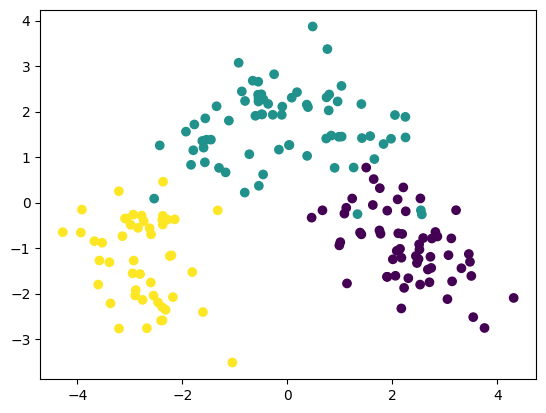

In [12]:
plt.scatter(df.iloc[:, 0], df.iloc[:,1],c=dataset.target)

In [13]:
#데이타설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.554063383569353


#지도학습(PCA전후비교)

In [14]:
#PCA후 데이터로 머신러닝(2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)

array([0.97222222, 0.94444444, 0.97222222, 0.94285714, 0.91428571])

In [15]:
#PCA후 데이터로 머신러닝(13)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5)

array([0.91666667, 0.94444444, 0.94444444, 0.97142857, 1.        ])

In [16]:
#PCA (3차원) 시각화
df = data.copy()
pca = PCA(n_components=3)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

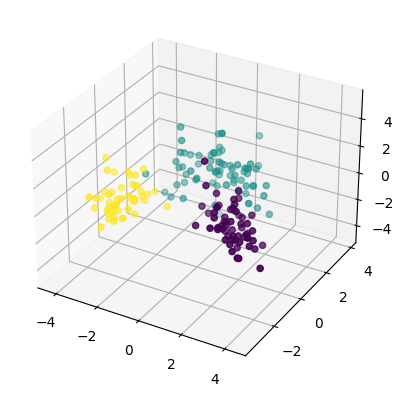

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=dataset.target)

### 점진적 PCA
데이터가 클때 사용(성능은 조금 떨어짐)

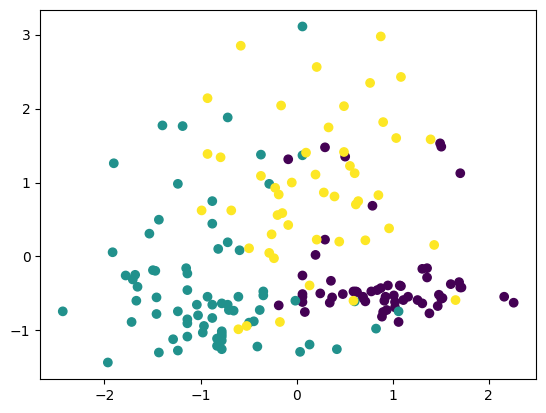

In [18]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA
# 데이터 복사
df = data.copy()
# 점진적 PCA
pca = IncrementalPCA(n_components=2, batch_size=16).fit(df) # fit(df)를 넣어야 에러가 안남
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [19]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.4924119400154381


### 희소 PCA
- 적절한 희소성을 유지(alpla값으로 조정)
- 오버피팅 방지

In [20]:
from sklearn.decomposition import SparsePCA
df = data.copy()
pca = SparsePCA(n_components=2, alpha=0.01)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

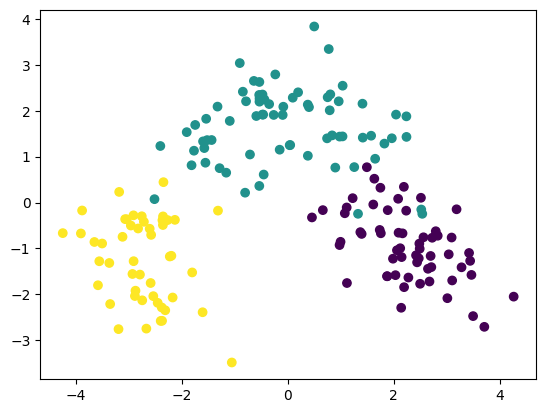

In [21]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c= dataset.target)

### 커널PCA

비선형으로 차원축소

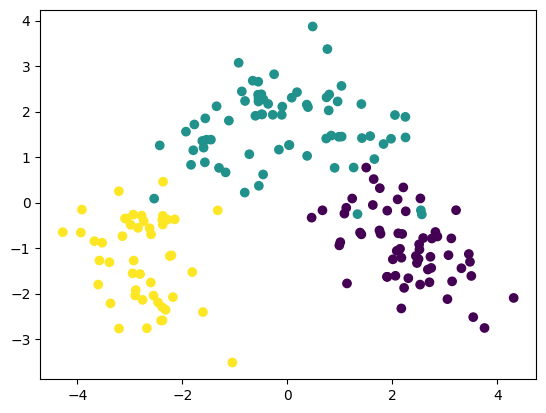

In [22]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA
df = data.copy()
pca = KernelPCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

### SVD(Singular Value Decomposition) 특이값 분해

행렬을 특정한 구조로 분해하는 방식
신호 처리와 통계학 등의 분야에서 자주 사용됨

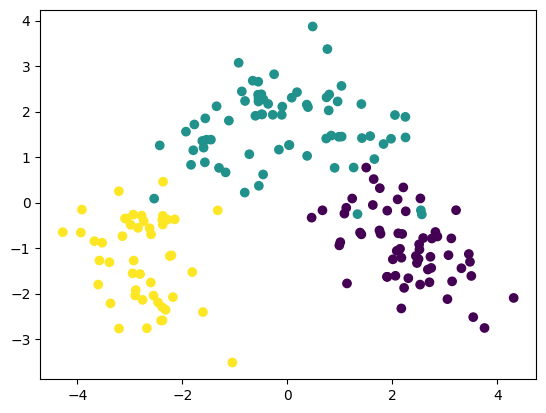

In [23]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

### 군집(Clustering)

- 군집분석은 유사성이 높은 대상의 집단을 분류하는 분석 방법
- 계층적 군집분석과 비계층적 군집분석 으로 구분함
  - 전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함
  - 비계층적 군집분석인 K-means는 군집의 수를 가장 먼저 선정함
  - K-mean 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함
- 군집분석의 평가지표
  - Silhouette(실루엣), Dunn Index 등 활용

비계층적 군집분석

- 대표적인 방법 K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
- n_clusters 하이퍼파라미터 반드시 설정


In [31]:
# KMeans 라이브러리
from sklearn.cluster import KMeans
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [32]:
kmeans =KMeans(n_clusters= 3)
kmeans.fit(df)

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [33]:
pred = kmeans.predict(df)

In [34]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


In [59]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df) # 피쳐수줄임
df = pd.DataFrame(df)
df
# plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [60]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred= kmeans.predict(df)
df['kmeans'] = pred
df

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,kmeans
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


In [61]:
centers = kmeans.cluster_centers_
centers

array([[ 448.29677492,   -2.2569996 ],
       [-288.75258647,   -2.23889973],
       [ -18.48419282,    4.20263004]])

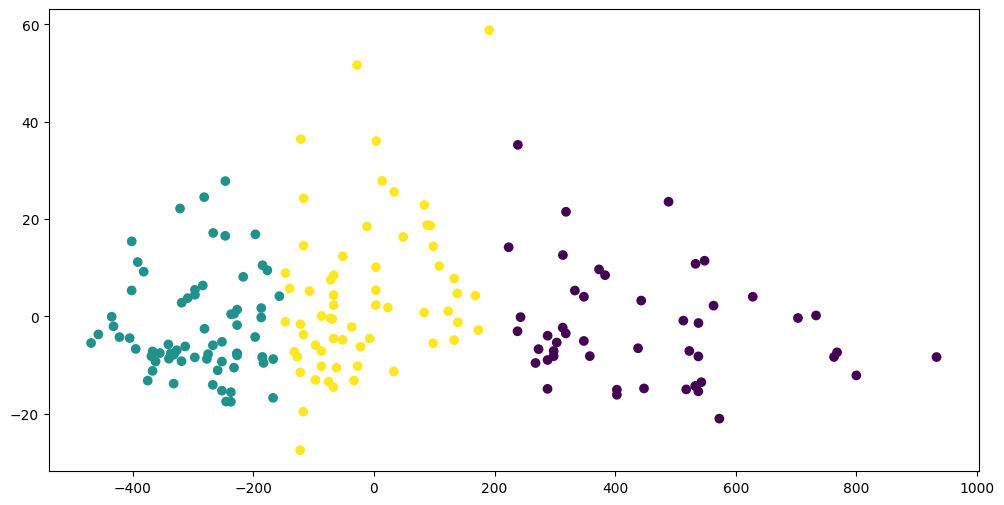

In [62]:
plt.figure(figsize =(12,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df.kmeans)

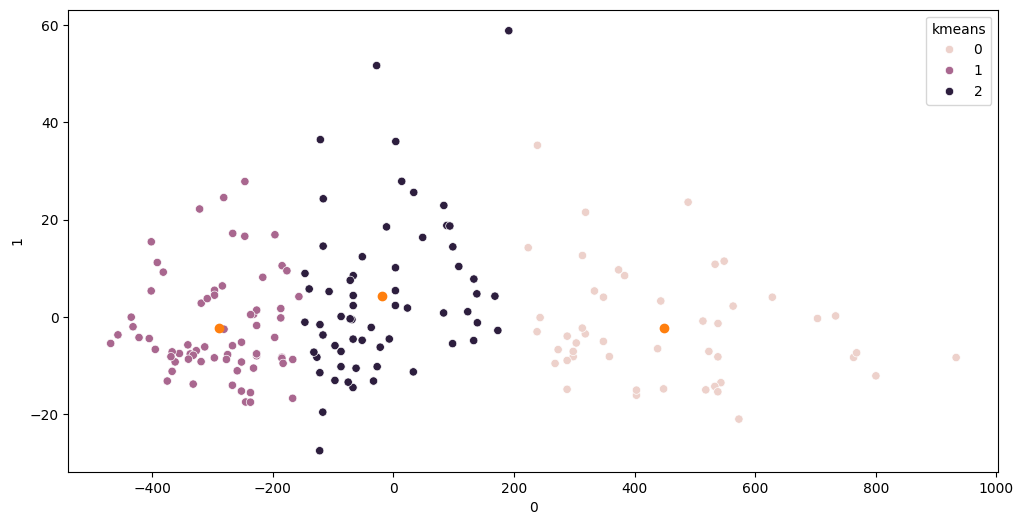

In [63]:
import seaborn as sns
plt.figure(figsize =(12,6))
sns.scatterplot(data=df, x = df.iloc[:,0], y= df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1]) # 센터의 x, y값

### 클러스터 개수 찾는 방법(엘보우방법, elbow method)

In [67]:
#컬럼을 
df.columns = df.columns.astype(str)
df

,0,1,kmeans
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


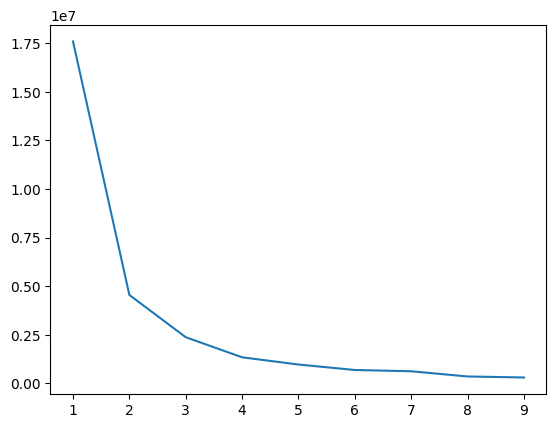

In [68]:
#군집수 찾기
df.columns = df.columns.astype(str)
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, random_state = 2022, n_init= 1) #n_init 명시
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10),inertia)

### 2. 계층적 군집분석

**대표적인 방법 덴드로그램**
k-means와 달리 군집 개수를 사전에 설정하지 않음

In [73]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [74]:
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [82]:
print(dataset.target[:3])
print(dataset.target[70:73])
print(dataset.target[160:163])

[0 0 0]
[1 1 1]
[2 2 2]


In [77]:
# 샘플링
kdata = df[:3].copy()
kdata = pd.concat([kdata,df[70:73]])
kdata = pd.concat([kdata,df[160:163]])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411472055, 30.991512411472055, 0.0],
  [0.0, 147.87787795984784, 147.87787795984784, 30.991512411472055],
  [0.0, 48.02737852215073, 48.02737852215073, 0.0],
  [0.0, 88.071940002761, 88.071940002761, 48.02737852215073],
  [0.0, 135.87135248973317, 135.87135248973317, 88.071940002761],
  [0.0, 190.03011431770932, 190.03011431770932, 0.0],
  [135.87135248973317, 461.015873691147, 461.015873691147, 190.03011431770932],
  [147.87787795984784,
   1026.396544382854,
   1026.396544382854,
   461.015873691147]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2',

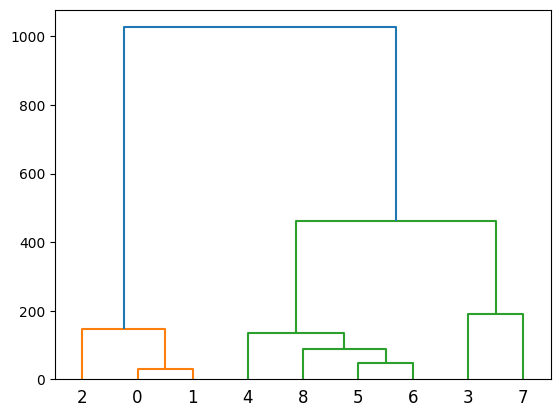

In [78]:
# 덴드로그램
linkage = ward(kdata) # 거리정보
dendrogram(linkage)